# Lab 4 - Predicting a Continuous Target with Regression (Titanic)

Name: Terry Konkin  
Date: April 4, 2025  
Objective: To analyze the Titanic datset.

Imports

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Section 1. Import and Inspect the Data

Load the Titanic dataset and confirm it's structured correctly.  
  
Important: This code requires importing seaborn as sns and pandas.  Our variable titanic holds a pandas DataFrame object.  Know what imports are required for each bit of code.

In [2]:
# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Section 2. Data Exploration and Preparation

Prepare the Titanic data for regression modelling.  See the previous work.  
  
Impute missing values for age using median.

In [3]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

Drop rows with missing fare (or impute if preferred)

In [4]:
titanic = titanic.dropna(subset=['fare'])

Create numeric variables (family_size from sibsp + parch + 1)

In [5]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

### Section 3. Feature Selection and Justification

Define multiple combinations of features to use as inputs to predict fare.  

Use unique names (X1, y1, X2, y2, etc.) so results are visible and can be compared at the same time.  
  
Remember the inputs, usually X, are a 2D array. The target is a 1D array. 

Case 1. age only

In [6]:
# Case 1. age
X1 = titanic[['age']]
y1 = titanic['fare']


Case 2. family_size only

In [7]:
# Case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']


Case 3. age and family_size

In [8]:
# Case 3. age, family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']


Case 4. Your choice

In [9]:
# choose sex and convert to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
# Case 4. 
X4 = titanic[['sex']]
y4 = titanic['fare']


Reflection Questions - answer these in your notebook (in a Markdown cell):

1. Why might these features affect a passenger’s fare:  
   Age because children might be charged a lower fare.  
   Family size because there may be a discounted fare for that scenario.

2. List all available features:  
   suvived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone  
   
3. Which other features could improve predictions and why:  
   Possibly embark_town, as certain cities may have a higher fare. 
   
4. How many variables are in your Case 4:  
   Two variables, X4 and y4.
   
5. Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs:  
   Chose sex and fare, as fare should not be affected by Sex.

### Section 4. Train a Regression Model (Linear Regression)

4.1 Split the Data

In [10]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)


4.2 Train and Evaluate Linear Regression Models (all 4 cases)  
  
We'll use a more concise approach - create each model and immediately call the fit() method. 

In [11]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

# TODO: repeat for case 3 and 4 .... 
y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)



4.3 Report Performance

In [21]:
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", np.sqrt(mean_squared_error(y1_test, y_pred_test1)))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))

# TODO: Repeat for Cases 2-4....
print("Case 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", np.sqrt(mean_squared_error(y2_test, y_pred_test2)))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))

print("Case 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", np.sqrt(mean_squared_error(y3_test, y_pred_test3)))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))

print("Case 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", np.sqrt(mean_squared_error(y4_test, y_pred_test4)))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))

Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 37.97164180172938
Case 1: Test MAE: 25.28637293162364
Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 37.6114940041967
Case 2: Test MAE: 25.02534815941641
Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 37.0777586646559
Case 3: Test MAE: 24.284935030470688
Case 4: Training R²: 0.023885614755059348
Case 4: Test R²: 0.09936584220882583
Case 4: Test RMSE: 36.09746477477291
Case 4: Test MAE: 24.24249103567552


Section 4 Reflection Questions - answer these in your notebook (in a Markdown cell):  

Compare the train vs test results for each.  

Did Case 1 overfit or underfit? Explain:  
Underfit, because R2 is low for both train & test.  

Did Case 2 overfit or underfit? Explain:  
Underfit, because R2 is low for both train & test.  

Did Case 3 overfit or underfit? Explain:  
Underfit, because R2 is low for both train & test.  

Did Case 4 overfit or underfit? Explain:  
Underfit, because R2 is low for both train & test.  

Adding Age

Did adding age improve the model:  
No, because the performance was equally as low as the other cases.  

Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that):  
Age might affect ticket price today, however children fares may not have been cheaper during the time period of the Titanic.  

Worst

Which case performed the worst:  
Case 1  

How do you know:  
 It had low R squared, in addition to highest RMSE. 

Do you think adding more training data would improve it (and why/why not): 
Yes, because it has a low R2 score,  

Best

Which case performed the best:  
Case 4  
  
How do you know:  
Case 4 had the highest test R2, and the best MAE.  

Do you think adding more training data would improve it (and why/why not):  
Yes, because although it is the best case, it still has a low R2 score.

### Section 5 Compare Alternative Models

In this section, we will take the best-performing case and explore other regression models.

Choose Best Case to Continue  
  
Choose the best case model from the four cases.  Use that model to continue to explore additional continuous prediction models.  The following assumes that Case 1 was the best predictor - this may not be the best case.  Adjust the code to use your best case model instead.

Choosing Options  
  
When working with regression models, especially those with multiple input features, we may run into overfitting — where a model fits the training data too closely and performs poorly on new data. To prevent this, we can apply regularization.  
  
Regularization adds a penalty to the model’s loss function, discouraging it from using very large weights (coefficients). This makes the model simpler and more likely to generalize well to new data.  
  
In general:  
  
* If the basic linear regression is overfitting, try Ridge.

* If you want the model to automatically select the most important features, try Lasso.

* If you want a balanced approach, try Elastic Net.

5.1 Ridge Regression (L2 penalty)  
  
Ridge Regression is a regularized version of linear regression that adds a penalty to large coefficient values. It uses the L2 penalty, which adds the sum of squared coefficients to the loss function.  This "shrinks" the coefficients, reducing the model’s sensitivity to any one feature while still keeping all features in the model.  
  
* Penalty term: L2 = sum of squared weights
* Effect: Shrinks weights, helps reduce overfitting, keeps all features

Note:  Case 4 (Sex vs fare) was deemed the best; however, as it is not continuous, Case 1 will be utilized.

In [12]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X1_train, y1_train)
y_pred_ridge = ridge_model.predict(X1_test)


5.2 Elastic Net (L1 + L2 combined)  
  
Lasso Regression uses the L1 penalty, which adds the sum of absolute values of the coefficients to the loss function. Lasso can shrink some coefficients all the way to zero, effectively removing less important features. This makes it useful for feature selection.  
  
* Penalty term: L1 = sum of absolute values of weights
* Effect: Can shrink some weights to zero (drops features), simplifies the model  
  
Elastic Net combines both L1 (Lasso) and L2 (Ridge) penalties. It balances the feature selection ability of Lasso with the stability of Ridge.  
  
We control the balance with a parameter called l1_ratio:  
  
* If l1_ratio = 0, it behaves like Ridge
* If l1_ratio = 1, it behaves like Lasso
* Values in between mix both types
* Penalty term: α × (L1 + L2)
* Effect: Shrinks weights and can drop some features — flexible and powerful

In [13]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X1_train, y1_train)
y_pred_elastic = elastic_model.predict(X1_test)


5.3 Polynomial Regression  
  
Linear regression is a simple two dimensional relationship - a simple straight line. But we can test more complex relationships. Polynomial regression adds interaction and nonlinear terms to the model. Be careful here - higher-degree polynomials can easily overfit.

In [14]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X1_train)
X_test_poly = poly.transform(X1_test)


In [15]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y1_train)
y_pred_poly = poly_model.predict(X_test_poly)


5.4 Visualize Polynomial Cubic Fit (for 1 input feature)  
  
Choose a case with just one input feature and plot it.  For example:

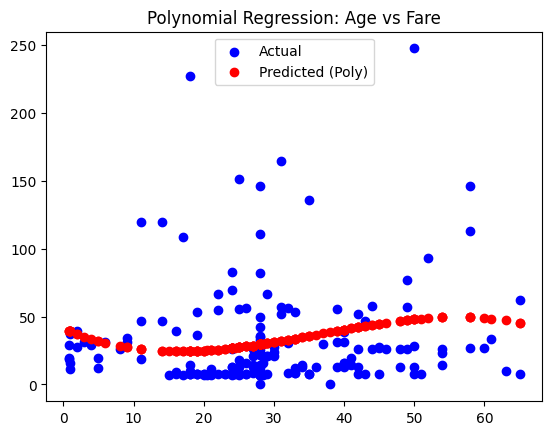

In [16]:
plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Age vs Fare")
plt.show()


5.4 Reflections:  
  
1. What patterns does the cubic model seem to capture:  
   The model captures the upward tend in fare as age increases.  

2. Where does it perform well or poorly:  
   It performs better where there are more data points. 

3. Did the polynomial fit outperform linear regression:  
4. Yes, it appears so.
    
5. Where (on the graph or among which kinds of data points) does it fit best:  
   It fits best where ther are mor data points; i.e., age 20 - 50  
   

5.5 Compare All Models  
  
Create a summary table or printout, comparing all models:

In [27]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y4_test, y_pred_test4)
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y4_test, y_pred_elastic)
report("Polynomial", y4_test, y_pred_poly)



Linear R²: 0.099
Linear RMSE: 36.10
Linear MAE: 24.24

Ridge R²: 0.099
Ridge RMSE: 36.10
Ridge MAE: 24.24

ElasticNet R²: 0.068
ElasticNet RMSE: 36.71
ElasticNet MAE: 24.33

Polynomial R²: 0.099
Polynomial RMSE: 36.10
Polynomial MAE: 24.24



5.5 Visualize Higher Order Polynomial (for the same 1 input case)  
  
Use the same single input case as you visualized above, but use a higher degree polynomial (e.g., 4, 5, 6, 7, or 8).  Plot the results.  
  


In [17]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=6)
X_train_poly = poly.fit_transform(X1_train)
X_test_poly = poly.transform(X1_test)

In [18]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y1_train)
y_pred_poly = poly_model.predict(X_test_poly)


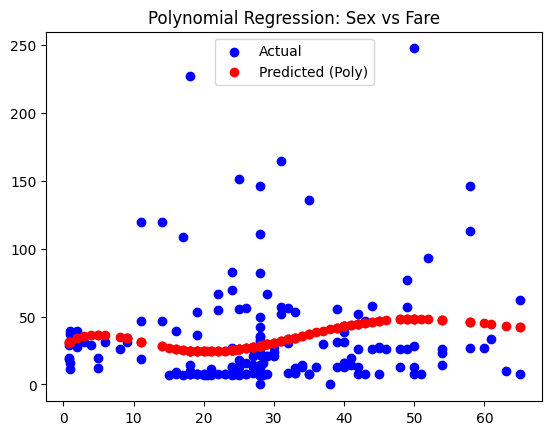

In [19]:
plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Sex vs Fare")
plt.show()


In a markdown cell, tell us which option seems to work better - your initial cubic (3) or your higher order, and why.  
Both plots appear to be similar.

### Section 6. Final Thoughts & Insights  
  
Your notebook should tell a data story.  Use this section to demonstrate your thinking and values as an analyst.

6.1 Summarize Findings  
  
1. What features were most useful?  
   None of the features had a high R2 so they were equal usefulness. 
   
2. What regression model performed best?  
   Polynomial performed better than linear. 
   
3. How did model complexity or regularization affect results?  
   It did not affect the results, as the 2 different degrees yielded similar graphs.

6.2 Discuss Challenges  
  
1. Was fare hard to predict? Why?  
   Fare is hard to predict because none of the features are good indicators.   
   
2. Did skew or outliers impact the models?  
   Outliers did impact.